## Unzip and extract the Kaggle data

In [ ]:
# import zipfile
# import os

# # Paths to your zip files
# train_zip_path = '/content/drive/MyDrive/Computer Vision Project/Kaggle_Data/cars_train.zip'
# test_zip_path = '/content/drive/MyDrive/Computer Vision Project/Kaggle_Data/cars_test.zip'

# # Destination folder to extract files
# extract_dir = '/content/drive/MyDrive/Computer Vision Project/Kaggle_Data/extracted_images'
# os.makedirs(extract_dir, exist_ok=True)  # Create the directory if it doesn't exist

# # Function to unzip files
# def unzip_file(zip_path, dest_dir):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(dest_dir)

# # Unzip train and test files
# unzip_file(train_zip_path, os.path.join(extract_dir, 'train'))
# unzip_file(test_zip_path, os.path.join(extract_dir, 'test'))

# print("Files extracted successfully!")


Files extracted successfully!


### Convert Kaggle Data Labels to a csv

In [ ]:
import scipy.io
import pandas as pd

# Load the .mat file
mat_data = scipy.io.loadmat('/content/drive/MyDrive/Computer Vision Project/Kaggle_Data/cars_annos.mat')
print(mat_data.keys())


annotations = mat_data['annotations']
# print(annotations.shape)
# print(type(annotations))
# print(annotations[:5])

# class_names = mat_data['class_names']
# print(class_names.shape)
# print(type(class_names))
# print(class_names[:5])


# Initialize an empty list to store each row of data
rows = []

# Iterate through each annotation
for item in annotations[0]:  # 'annotations[0]' to access each record in the structured array
    image_path = item['relative_im_path'][0]     # Extract image path
    x1 = item['bbox_x1'][0][0]                   # Extract bbox_x1 coordinate
    y1 = item['bbox_y1'][0][0]                   # Extract bbox_y1 coordinate
    x2 = item['bbox_x2'][0][0]                   # Extract bbox_x2 coordinate
    y2 = item['bbox_y2'][0][0]                   # Extract bbox_y2 coordinate
    class_label = item['class'][0][0]            # Extract class label
    annotation_flag = item['test'][0][0]         # Extract annotation flag

    # Append the flattened data as a dictionary to the rows list
    rows.append({
        'image_path': image_path,
        'x1': x1,
        'y1': y1,
        'x2': x2,
        'y2': y2,
        'class_label': class_label,
        'annotation_flag': annotation_flag
    })

# Convert the data to a DataFrame (assuming it's in a 2D array format; modify if necessary)
kaggle_label_df = pd.DataFrame(rows)

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])


In [ ]:
kaggle_label_df.head(10)

,image_path,x1,y1,x2,y2,class_label,annotation_flag
0,car_ims/000001.jpg,112,7,853,717,1,0
1,car_ims/000002.jpg,48,24,441,202,1,0
2,car_ims/000003.jpg,7,4,277,180,1,0
3,car_ims/000004.jpg,33,50,197,150,1,0
4,car_ims/000005.jpg,5,8,83,58,1,0
5,car_ims/000006.jpg,10,6,250,110,1,0
6,car_ims/000007.jpg,56,1,394,176,1,0
7,car_ims/000008.jpg,1,13,113,83,1,0
8,car_ims/000009.jpg,15,111,271,272,1,0
9,car_ims/000010.jpg,14,18,148,107,1,0


In [ ]:
kaggle_label_df['image_path'] = kaggle_label_df['image_path'].str.replace('car_ims/', '')

In [ ]:
kaggle_label_df.head(10)

,image_path,x1,y1,x2,y2,class_label,annotation_flag
0,000001.jpg,112,7,853,717,1,0
1,000002.jpg,48,24,441,202,1,0
2,000003.jpg,7,4,277,180,1,0
3,000004.jpg,33,50,197,150,1,0
4,000005.jpg,5,8,83,58,1,0
5,000006.jpg,10,6,250,110,1,0
6,000007.jpg,56,1,394,176,1,0
7,000008.jpg,1,13,113,83,1,0
8,000009.jpg,15,111,271,272,1,0
9,000010.jpg,14,18,148,107,1,0


# ⏰ File names in .mat file are not consistent with file names in car_test/car_train directories. However, the kaggle community came together to fix the labels

https://www.kaggle.com/datasets/jessicali9530/stanford-cars-dataset/discussion/544617

### Load the correct labels in .csv format

In [ ]:
import pandas as pd
correct_labels_path = '/content/drive/MyDrive/Computer Vision Project/Kaggle_Data/stanford_cars_with_class_names.xlsx'
train_labels_df = pd.read_excel(correct_labels_path, sheet_name="train", index_col=None)
test_labels_df = pd.read_excel(correct_labels_path, sheet_name="test", index_col=None)
print(train_labels_df.head())
print(test_labels_df.head())

   Unnamed: 0   x1   y1    x2    y2  class  \
0           0   39  116   569   375     14   
1           1   36  116   868   587      3   
2           2   85  109   601   381     91   
3           3  621  393  1484  1096    134   
4           4   14   36   133    99    106   

                       true_class_name      image  
0                  Audi TTS Coupe 2012  00001.jpg  
1                  Acura TL Sedan 2012  00002.jpg  
2           Dodge Dakota Club Cab 2007  00003.jpg  
3     Hyundai Sonata Hybrid Sedan 2012  00004.jpg  
4  Ford F-450 Super Duty Crew Cab 2012  00005.jpg  
    x1   y1   x2   y2  class                      true_class_name        image
0   30   52  246  147    181              Suzuki Aerio Sedan 2007  '00001.jpg'
1  100   19  576  203    103  Ferrari 458 Italia Convertible 2012  '00002.jpg'
2   51  105  968  659    145                Jeep Patriot SUV 2012  '00003.jpg'
3   67   84  581  407    187              Toyota Camry Sedan 2012  '00004.jpg'
4  140  151  593

In [ ]:
train_labels_df = train_labels_df.drop(columns=['Unnamed: 0'])

In [ ]:
train_labels_df

,x1,y1,x2,y2,class,true_class_name,image
0,39,116,569,375,14,Audi TTS Coupe 2012,00001.jpg
1,36,116,868,587,3,Acura TL Sedan 2012,00002.jpg
2,85,109,601,381,91,Dodge Dakota Club Cab 2007,00003.jpg
3,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,00004.jpg
4,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,00005.jpg
...,...,...,...,...,...,...,...
8139,3,44,423,336,78,Chrysler Town and Country Minivan 2012,08140.jpg
8140,138,150,706,523,196,smart fortwo Convertible 2012,08141.jpg
8141,26,246,660,449,163,Mercedes-Benz SL-Class Coupe 2009,08142.jpg
8142,78,526,1489,908,112,Ford GT Coupe 2006,08143.jpg


In [ ]:
test_labels_df['image'] = test_labels_df['image'].str.strip("'")

In [ ]:
test_labels_df

,x1,y1,x2,y2,class,true_class_name,image
0,30,52,246,147,181,Suzuki Aerio Sedan 2007,00001.jpg
1,100,19,576,203,103,Ferrari 458 Italia Convertible 2012,00002.jpg
2,51,105,968,659,145,Jeep Patriot SUV 2012,00003.jpg
3,67,84,581,407,187,Toyota Camry Sedan 2012,00004.jpg
4,140,151,593,339,185,Tesla Model S Sedan 2012,00005.jpg
...,...,...,...,...,...,...,...
8036,49,57,1169,669,63,Chevrolet Sonic Sedan 2012,08037.jpg
8037,23,18,640,459,16,Audi V8 Sedan 1994,08038.jpg
8038,33,27,602,252,17,Audi 100 Sedan 1994,08039.jpg
8039,33,142,521,376,38,BMW Z4 Convertible 2012,08040.jpg


In [ ]:
# Save train and test labels
train_labels_df.to_csv('/content/drive/MyDrive/Computer Vision Project/Kaggle_Data/train_labels.csv', index=False)
test_labels_df.to_csv('/content/drive/MyDrive/Computer Vision Project/Kaggle_Data/test_labels.csv', index=False)

### EDA

In [ ]:
train_label_counts = train_labels_df['class'].value_counts()
print(train_label_counts)

class
119    68
79     49
161    48
167    48
144    47
       ..
175    31
64     30
158    29
99     28
136    24
Name: count, Length: 196, dtype: int64


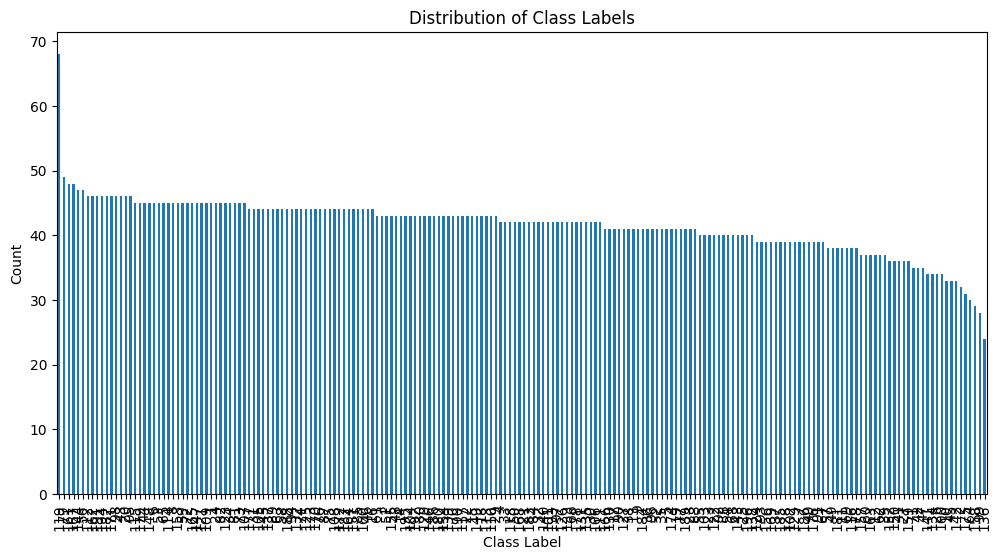

In [ ]:
import matplotlib.pyplot as plt
# Plot the distribution
plt.figure(figsize=(12, 6))
train_label_counts.plot(kind='bar')
plt.title('Distribution of Class Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels for readability if there are many classes
plt.show()

In [ ]:
test_label_counts = test_labels_df['class'].value_counts()
print(test_label_counts)

class
119    68
161    48
79     48
167    47
56     46
       ..
175    30
158    29
64     29
99     27
136    24
Name: count, Length: 196, dtype: int64


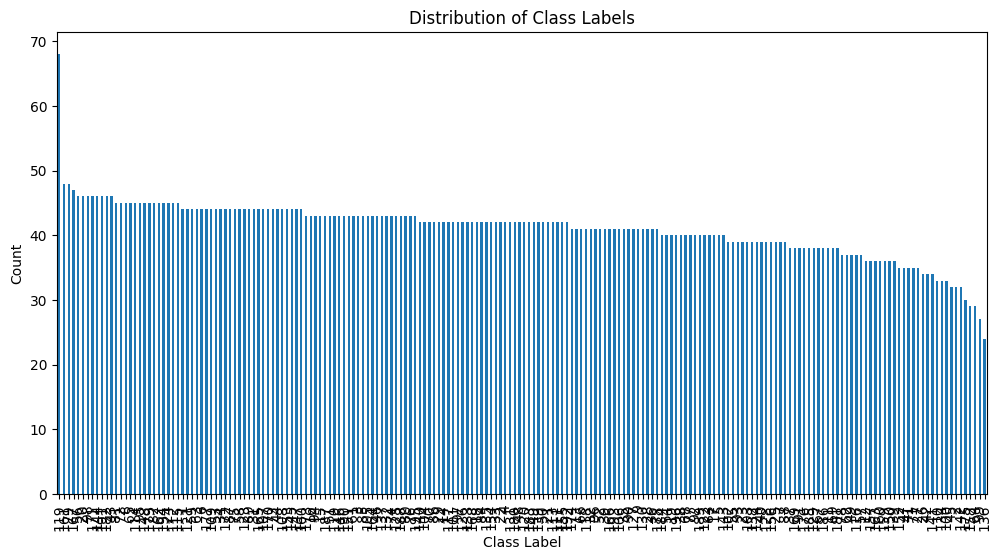

In [ ]:
import matplotlib.pyplot as plt
# Plot the distribution
plt.figure(figsize=(12, 6))
test_label_counts.plot(kind='bar')
plt.title('Distribution of Class Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels for readability if there are many classes
plt.show()